In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import env 
import wrangle as w

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## <span style="color: purple;">EXPLORE ZILLOW

## <span style="color: purple;">Acquare Zillow data from SQL

In [2]:
#my code found from wrangle.py
#def get_zillow_data():
#     # Define the filename
#     filename = 'zillow_df.csv'
    
#     # Check if the file exists
#     if os.path.isfile(filename):
#         return pd.read_csv(filename)
#     else:

# # SQL query

#         sql_query = """
#         SELECT prop.*, 
#                pred.logerror, 
#                pred.transactiondate, 
#                ac.airconditioningdesc, 
#                as.architecturalstyledesc, 
#                bc.buildingclassdesc, 
#                ht.heatingorsystemdesc, 
#                pl.propertylandusedesc, 
#                sd.storydesc, 
#                tc.typeconstructiondesc 
        
#         FROM   properties_2017 prop  
#                INNER JOIN (SELECT parcelid,
#                                   logerror,
#                                   Max(transactiondate) transactiondate 
#                            FROM   predictions_2017 
#                            GROUP  BY parcelid, logerror) pred
#                        USING (parcelid) 
#                LEFT JOIN airconditioningtype ac USING (airconditioningtypeid) 
#                LEFT JOIN architecturalstyletype as USING (architecturalstyletypeid) 
#                LEFT JOIN buildingclasstype bc USING (buildingclasstypeid) 
#                LEFT JOIN heatingorsystemtype ht USING (heatingorsystemtypeid) 
#                LEFT JOIN propertylandusetype pl USING (propertylandusetypeid) 
#                LEFT JOIN storytype st USING (storytypeid) 
#                LEFT JOIN typeconstructiontype tc USING (typeconstructiontypeid) 
# #         WHERE  prop.latitude IS NOT NULL 
# #                AND prop.longitude IS NOT NULL AND pred.transactiondate like "2017%%' 
# #                 """
# #     return df
# # SQL query

# #Insturctor John G code
# sql = """
# SELECT prop.*, 
#        pred.logerror, 
#        pred.transactiondate, 
#        air.airconditioningdesc, 
#        arch.architecturalstyledesc, 
#        build.buildingclassdesc, 
#        heat.heatingorsystemdesc, 
#        landuse.propertylandusedesc, 
#        story.storydesc, 
#        construct.typeconstructiondesc 

# FROM   properties_2017 prop  
#        INNER JOIN (SELECT parcelid,
#        					  logerror,
#                           Max(transactiondate) transactiondate 
#                    FROM   predictions_2017 
#                    GROUP  BY parcelid, logerror) pred
#                USING (parcelid) 
#        LEFT JOIN airconditioningtype air USING (airconditioningtypeid) 
#        LEFT JOIN architecturalstyletype arch USING (architecturalstyletypeid) 
#        LEFT JOIN buildingclasstype build USING (buildingclasstypeid) 
#        LEFT JOIN heatingorsystemtype heat USING (heatingorsystemtypeid) 
#        LEFT JOIN propertylandusetype landuse USING (propertylandusetypeid) 
#        LEFT JOIN storytype story USING (storytypeid) 
#        LEFT JOIN typeconstructiontype construct USING (typeconstructiontypeid) 
# WHERE  prop.latitude IS NOT NULL 
#        AND prop.longitude IS NOT NULL AND transactiondate <= '2017-12-31' 
# """

In [3]:
# # acquire zillow data using the query
# def get_zillow(sql):
#     url = get_db_url('zillow')
#     zillow_df = pd.read_sql(sql_query, url)
#     return zillow_df


In [4]:
# df = get_zillow(sql)
# df.to_csv("zillow.csv")
# df = pd.read_csv("zillow.csv")

### Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)¶


In [5]:
df = w.get_zillow_data()

In [6]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,0,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,1,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,2,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,3,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,NaN,...,4,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        223 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77579 non-null  float64
 3   heatingorsystemtypeid         49571 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      207 non-null    float64
 6   airconditioningtypeid         25007 non-null  float64
 7   parcelid                      77613 non-null  int64  
 8   id                            77613 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77579 non-null  float64
 11  bedroomcnt                    77579 non-null  float64
 12  buildingqualitytypeid         49809 non-null  float64
 13  c

In [8]:
# find nulls

df.isnull().sum().sort_values(ascending = False)[:45]

buildingclassdesc           77598
buildingclasstypeid         77598
finishedsquarefeet13        77571
storydesc                   77563
basementsqft                77563
storytypeid                 77563
yardbuildingsqft26          77543
fireplaceflag               77441
architecturalstyletypeid    77406
architecturalstyledesc      77406
typeconstructiontypeid      77390
typeconstructiondesc        77390
finishedsquarefeet6         77227
pooltypeid10                77148
decktypeid                  76999
poolsizesum                 76744
pooltypeid2                 76539
hashottuborspa              76074
yardbuildingsqft17          75220
taxdelinquencyflag          74713
taxdelinquencyyear          74713
finishedsquarefeet15        74586
finishedsquarefeet50        71576
finishedfloor1squarefeet    71576
fireplacecnt                69324
threequarterbathnbr         67507
pooltypeid7                 62534
poolcnt                     61439
numberofstories             60014
airconditionin

#### Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [10]:
df.isnull().sum()

typeconstructiontypeid    77390
storytypeid               77563
propertylandusetypeid        34
heatingorsystemtypeid     28042
buildingclasstypeid       77598
                          ...  
buildingclassdesc         77598
heatingorsystemdesc       28042
propertylandusedesc          34
storydesc                 77563
typeconstructiondesc      77390
Length: 69, dtype: int64

In [11]:
def find_nulls(df):
    null_found = df.isnull().sum()
    rows = df.shape[0]
    pct_null = null_found / rows
    missing_nulls = pd.DataFrame({'number_missing_rows': null_found, 'percent_rows_missing': pct_null})
    return missing_nulls

In [12]:
col_nulls = find_nulls(df)
col_nulls.sort_values(by="percent_rows_missing", ascending=False).head(40)

,number_missing_rows,percent_rows_missing
buildingclassdesc,77598,0.999807
buildingclasstypeid,77598,0.999807
finishedsquarefeet13,77571,0.999459
storydesc,77563,0.999356
basementsqft,77563,0.999356
storytypeid,77563,0.999356
yardbuildingsqft26,77543,0.999098
fireplaceflag,77441,0.997784
architecturalstyletypeid,77406,0.997333
architecturalstyledesc,77406,0.997333


#### Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [13]:
#check data shape
df.shape

(77613, 69)

In [14]:
#John G  -  look at value counts for 'unitcnt'

df.unitcnt.value_counts(dropna = False)

1.0      47413
NaN      26910
2.0       2031
4.0        726
3.0        529
45.0         1
42.0         1
6.0          1
237.0        1
Name: unitcnt, dtype: int64

In [15]:
# John G  - Restrict df to only properties that meet single unit criteria

single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
df = df[df.propertylandusetypeid.isin(single_use)]
    
    
# Restrict df to only those properties with at least 1 bath & bed and >350 sqft area
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>350)]


In [16]:
# check # of columns and rows left
df.shape

(71359, 69)

#### Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

In [17]:
# John G 

def handle_missing_values(df, prop_required_column = .5, prop_required_row = .70):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df
df = handle_missing_values(df)

In [18]:
# check shape to see how many columns and rows were dropped

df.shape

(71359, 35)

In [19]:
# Asscess nulls to eliminate unnecessary columns
df.isnull().sum()

propertylandusetypeid               0
heatingorsystemtypeid           24945
parcelid                            0
id                                  0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26517
calculatedbathnbr                  15
calculatedfinishedsquarefeet        0
finishedsquarefeet12              167
fips                                0
fullbathcnt                        15
latitude                            0
longitude                           0
lotsizesquarefeet                8035
propertycountylandusecode           0
propertyzoningdesc              26224
rawcensustractandblock              0
regionidcity                     1322
regionidcounty                      0
regionidzip                        40
roomcnt                             0
unitcnt                         26198
yearbuilt                          35
structuretaxvaluedollarcnt         75
taxvaluedollarcnt                   1
assessmentye

In [20]:
# remove unnecessary columns which wont affect data integrity

cols_to_remove = ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc', 'unitcnt']

In [21]:
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df
df = remove_columns(df, cols_to_remove)

In [22]:
# review nulls

df.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26517
calculatedfinishedsquarefeet        0
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                8035
rawcensustractandblock              0
regionidcity                     1322
regionidcounty                      0
regionidzip                        40
roomcnt                             0
yearbuilt                          35
structuretaxvaluedollarcnt         75
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           5
logerror                            0
transactiondate                     0
heatingorsystemdesc             24945
dtype: int64

In [23]:
# Assess larger null counts for removal

df.heatingorsystemdesc.value_counts(dropna = False)

Central       31357
None          24945
Floor/Wall    13230
Yes             850
Forced air      776
Solar           101
None             60
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

From Instructor John G 

In [24]:
df.fips.value_counts()

6037.0    45321
6059.0    20290
6111.0     5748
Name: fips, dtype: int64

In [25]:
# removing ht sys would wipe out fips 6111 (ventura cty)
df[df.fips == 6111].heatingorsystemdesc.value_counts(dropna = False)

None    5748
Name: heatingorsystemdesc, dtype: int64

In [26]:
# We don't want to remove an entire value from fips, so we will drop this column entirely 

df.drop(columns = 'heatingorsystemdesc', inplace = True)

In [27]:
# buildingqualitytypeid
# Overall assessment of condition of the building from 
# low number = best quality
# higher numbers = worse quality

df.buildingqualitytypeid.value_counts(dropna = False)

NaN     26517
8.0     13404
6.0     12673
4.0      8227
7.0      5505
9.0      2113
5.0      1499
11.0      846
10.0      301
3.0       149
12.0      113
1.0         9
2.0         3
Name: buildingqualitytypeid, dtype: int64

In [28]:
df[df.fips == 6059].buildingqualitytypeid.value_counts(dropna = False)

NaN    20290
Name: buildingqualitytypeid, dtype: int64

In [29]:
# Check work
df.buildingqualitytypeid.value_counts(dropna = False)

NaN     26517
8.0     13404
6.0     12673
4.0      8227
7.0      5505
9.0      2113
5.0      1499
11.0      846
10.0      301
3.0       149
12.0      113
1.0         9
2.0         3
Name: buildingqualitytypeid, dtype: int64

In [30]:
# what is the median value of buildingqualitytypeid?

df.buildingqualitytypeid.median()

6.0

In [31]:
# should I fill missing values for buildingqualitytypeid with median value?
df.buildingqualitytypeid.fillna(6.0, inplace = True)

In [61]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid              0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                  0
rawcensustractandblock             0
regionidcity                    1322
regionidcounty                     0
regionidzip                       40
roomcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        75
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
logerror                           0
transactiondate                    0
dtype: int64

## <span style="color: purple;">Explore the data: 5 questions Log Error</span>

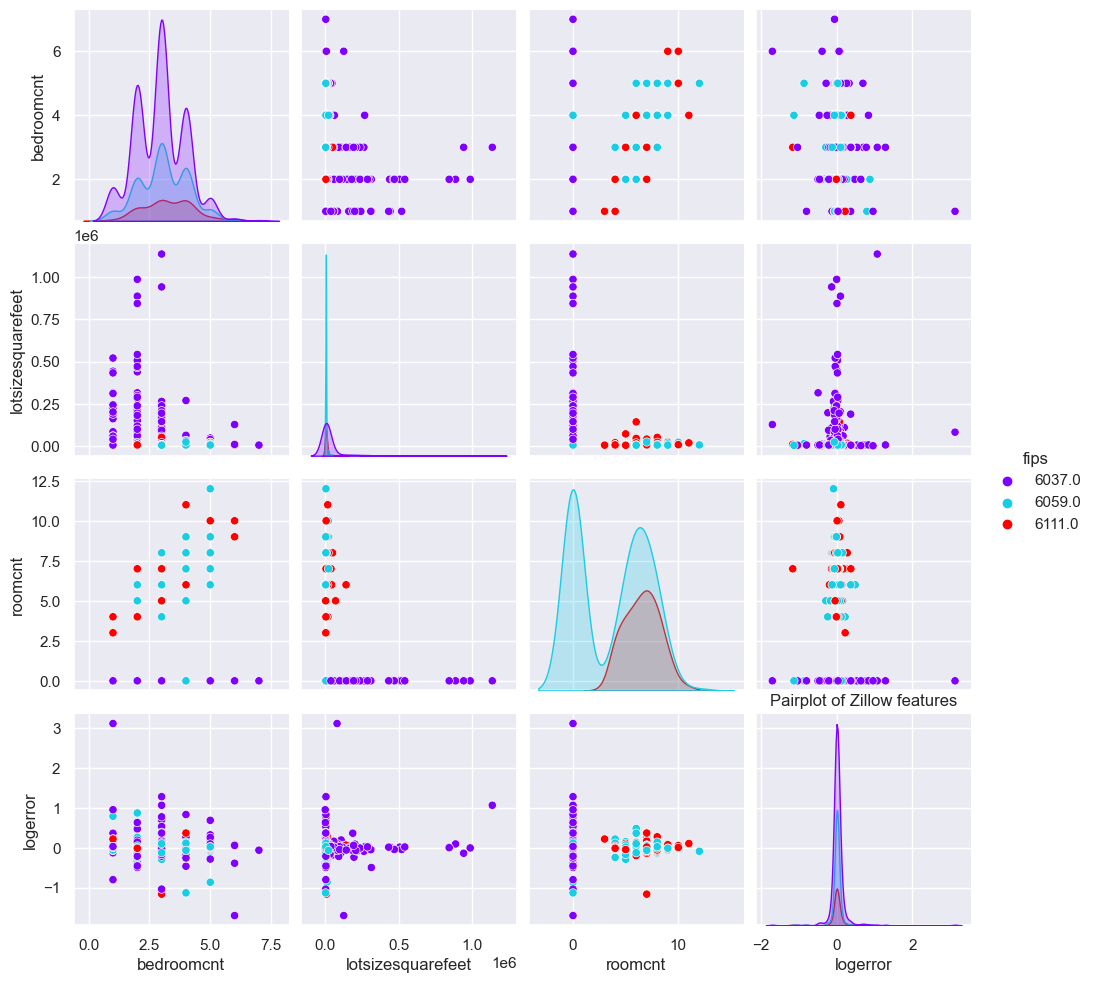

In [55]:
df_sample = df.sample(n=1000)
features = ['bedroomcnt', 'lotsizesquarefeet', 'roomcnt','logerror']
sns.pairplot(df_sample,vars=features, hue = 'fips', palette='rainbow')
plt.title('Pairplot of Zillow features')
plt.show()

In [32]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid              0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet               8035
rawcensustractandblock             0
regionidcity                    1322
regionidcounty                     0
regionidzip                       40
roomcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        75
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
logerror                           0
transactiondate                    0
dtype: int64

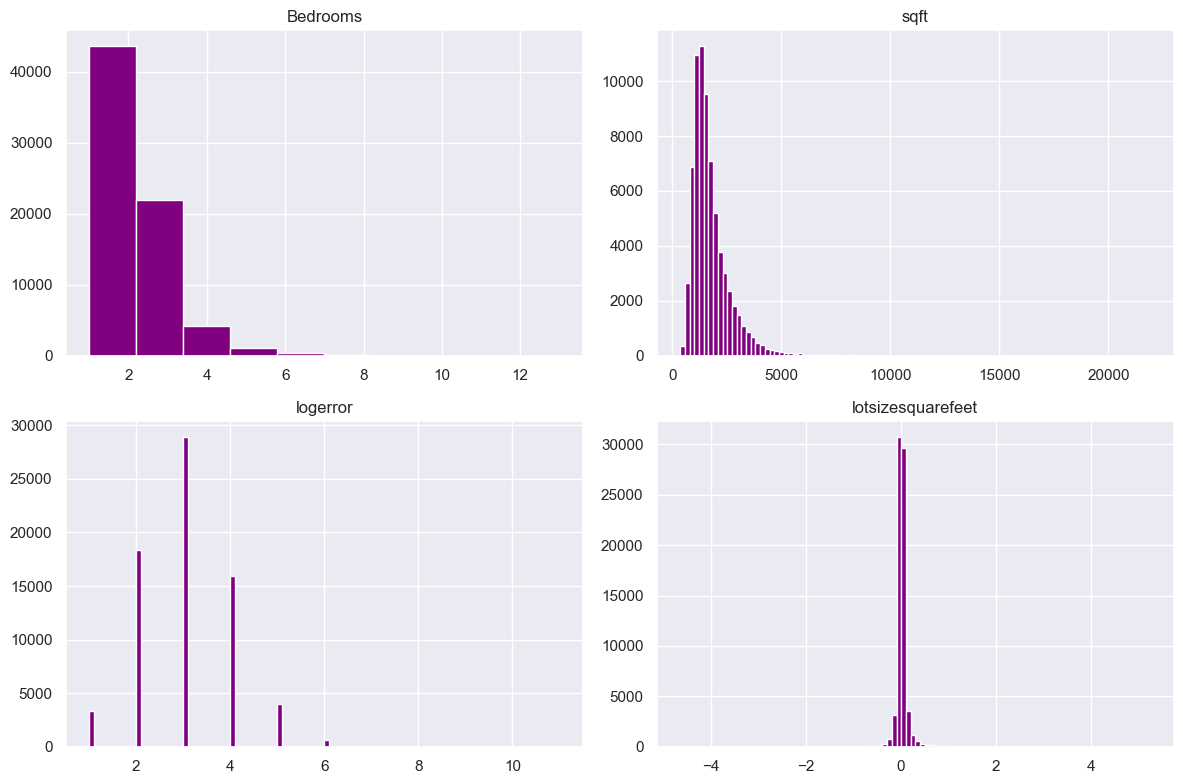

In [77]:
# plot some features from regression

plt.figure(figsize = (12,8))
plt.subplot(221)
plt.hist(df.bathroomcnt, bins = 10, color ='purple')
plt.title('Bedrooms')



plt.subplot(222)
plt.hist(df.calculatedfinishedsquarefeet, bins = 100,color ='purple')
plt.title('sqft')



plt.subplot(223)
plt.hist(df.bedroomcnt, bins = 100,color ='purple')
plt.title('logerror')



plt.subplot(224)
plt.hist(df.logerror, bins = 100,color ='purple')
plt.title('lotsizesquarefeet')

plt.tight_layout();

<Axes: >

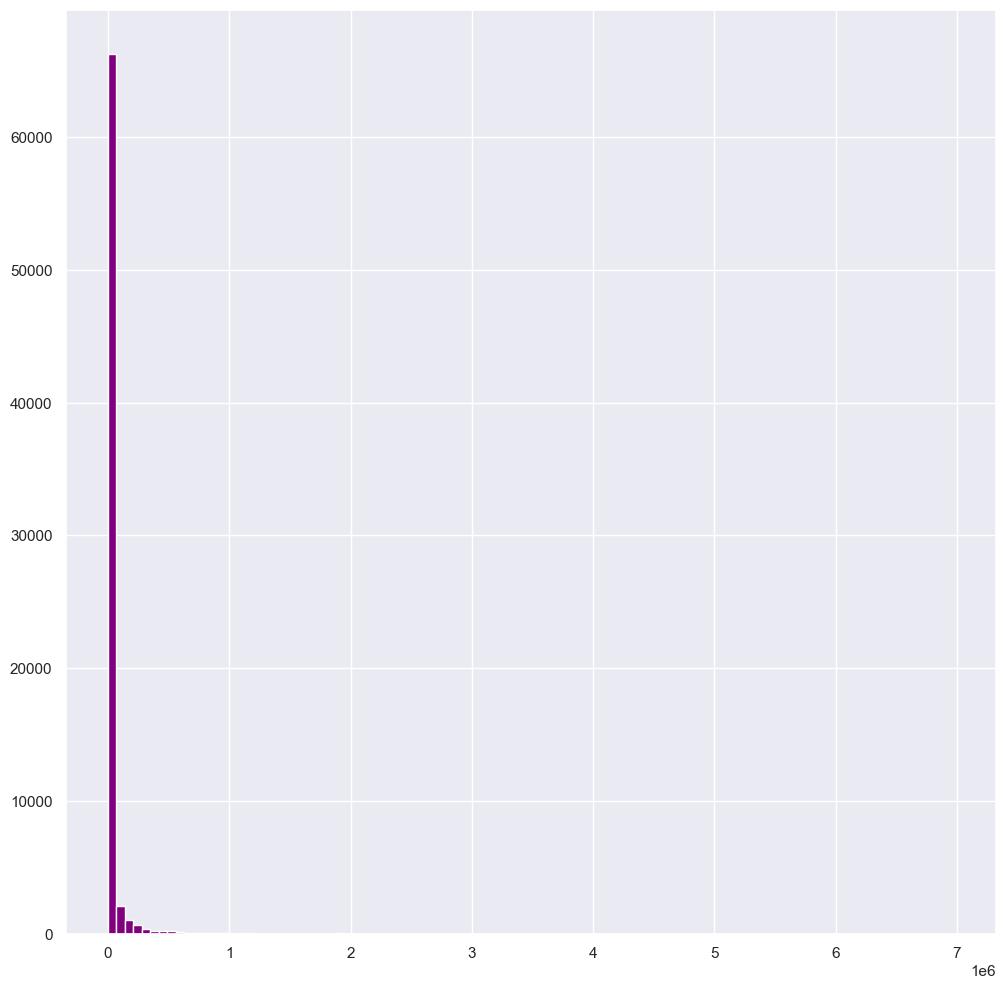

In [68]:
# look at lot-size distribution
df.lotsizesquarefeet.hist(bins = 100,color ='purple')

In [69]:
# what is the median lot size?

df.lotsizesquarefeet.median()

7313.0

In [71]:
# fill missing values with median null sizes

df.lotsizesquarefeet.fillna(7313, inplace = True)

In [36]:
df.shape

(71359, 22)

In [72]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid              0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                  0
rawcensustractandblock             0
regionidcity                    1322
regionidcounty                     0
regionidzip                       40
roomcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        75
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
logerror                           0
transactiondate                    0
dtype: int64

## <span style='color:purple'>IS BUILD QUALITY SIGNFICANT to LOG ERROR?

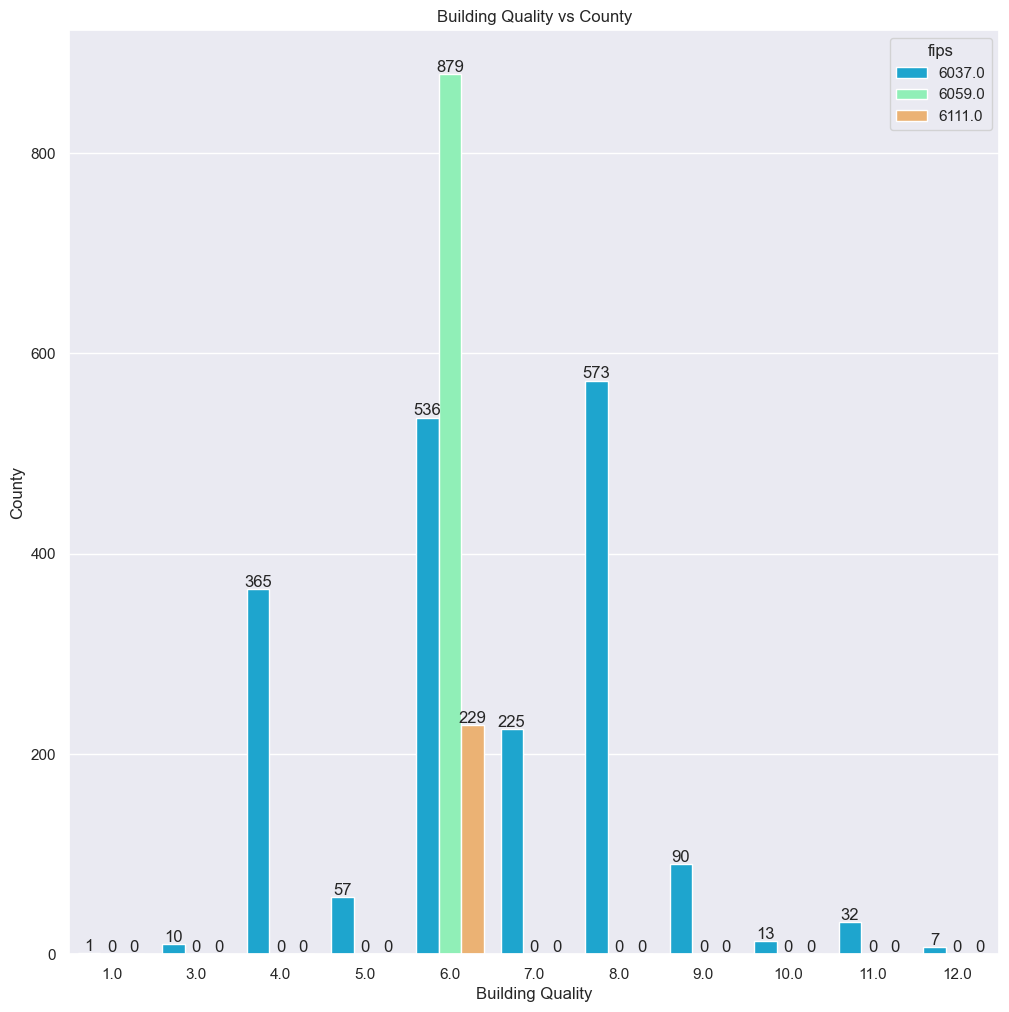

In [76]:
def build_bar(df):    
    df_sample = df.sample(n=3017)
    # Visualizing bathrooms by county
    build = sns.countplot(data=df_sample, x='buildingqualitytypeid', hue='fips', palette='rainbow')
    
    # Access the legend object

    build.set_xlabel('Building Quality')
    build.set_ylabel('County')
    plt.title('Building Quality vs County')
                          
     # Add count numbers on bars
    for p in build.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()    
        count = int(height)  # Get the count value
        offset = width * 0.02  # Adjust the offset percentage as needed
        build.annotate(format(count, ',d'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 
    plt.show()
build_bar(df)

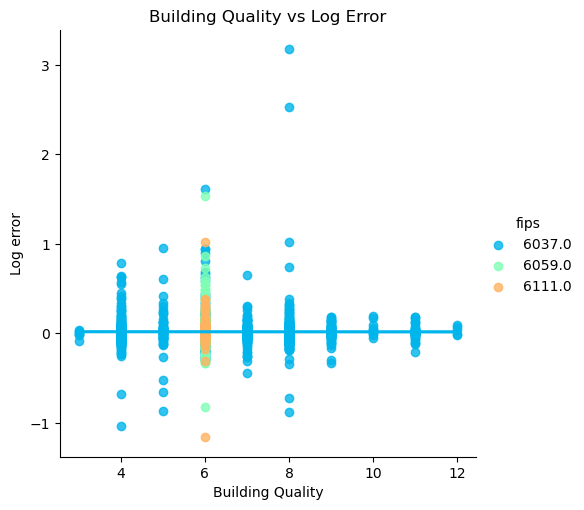

In [48]:
def plot_variable_pairs():
    df_sample = df.sample(n=3017)
    sns.lmplot(x='buildingqualitytypeid', y="logerror", data=df_sample, hue='fips',palette='rainbow')
    plt.xlabel('Building Quality') 
    plt.ylabel('Log error')
    plt.title('Building Quality vs Log Error')
plot_variable_pairs()


In [54]:
#Building stat
from scipy.stats import pearsonr, spearmanr
def build_stat(df):
    alpha = 0.05
    df_r, df_p = pearsonr(df.buildingqualitytypeid, df.logerror)
    print('train_r:', df_r)
    print('train_p:',df_p)
    if df_p < alpha:
        print('Outcome: We reject the null')
    else:
        print("Outcome: We fail to reject the null")
        
build_stat(df)

train_r: -0.010776541995346238
train_p: 0.003992139618069291
Outcome: We reject the null


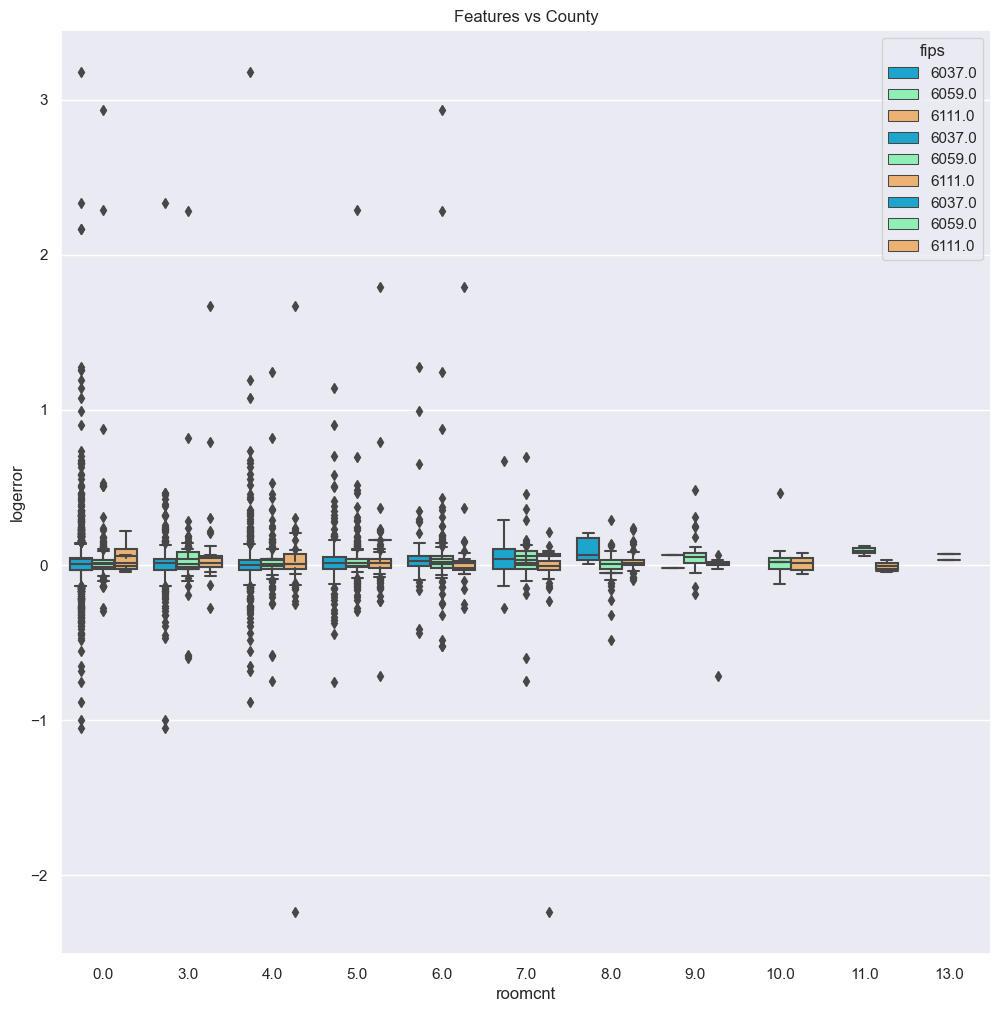

In [80]:
def zillow_in_box(df):
    df_sample = df.sample(n=3017)
    features = ['bedroomcnt', 'lotsizesquarefeet','roomcnt' ]
    
    for feature in features:
        sns.set(rc={'figure.figsize': (12, 12)})
        
        sns.boxplot(x=feature, y="logerror", data=df_sample, hue='fips',palette='rainbow')
        plt.title('Features vs County')
zillow_in_box(df)

<Axes: xlabel='bedroomcnt', ylabel='logerror'>

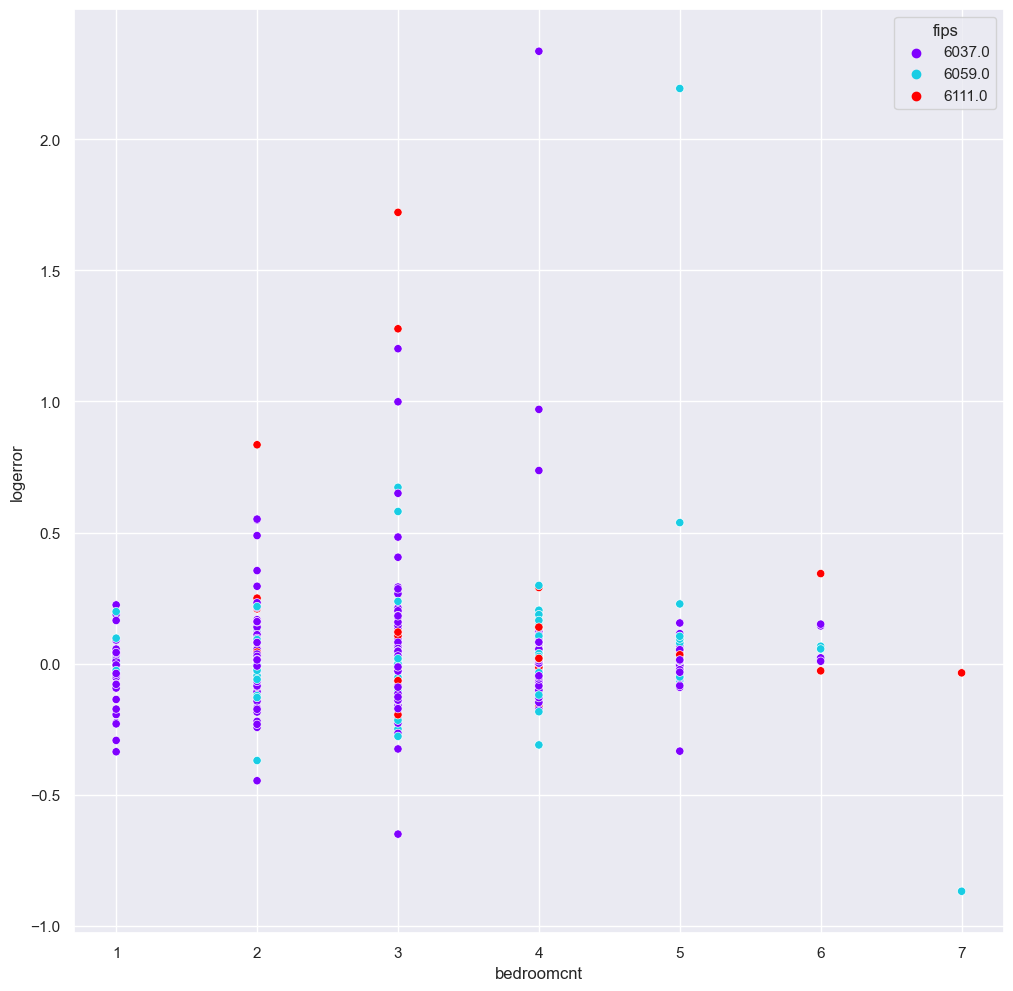

In [81]:
df_sample = df.sample(n=1000)
sns.scatterplot(x= 'bedroomcnt', y="logerror", data=df_sample, hue = 'fips', palette='rainbow')



<Axes: ylabel='logerror'>

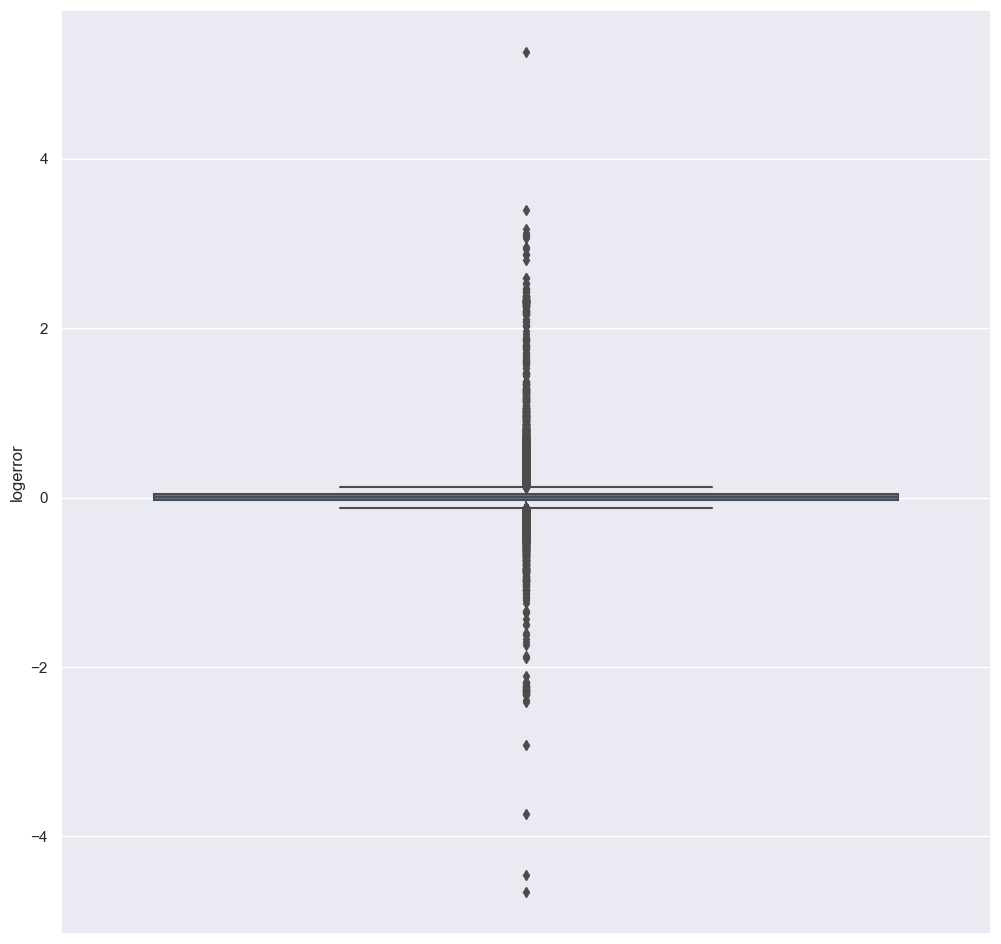

In [82]:
# plt.subplot(221)
sns.boxplot(y = 'logerror', data = df)

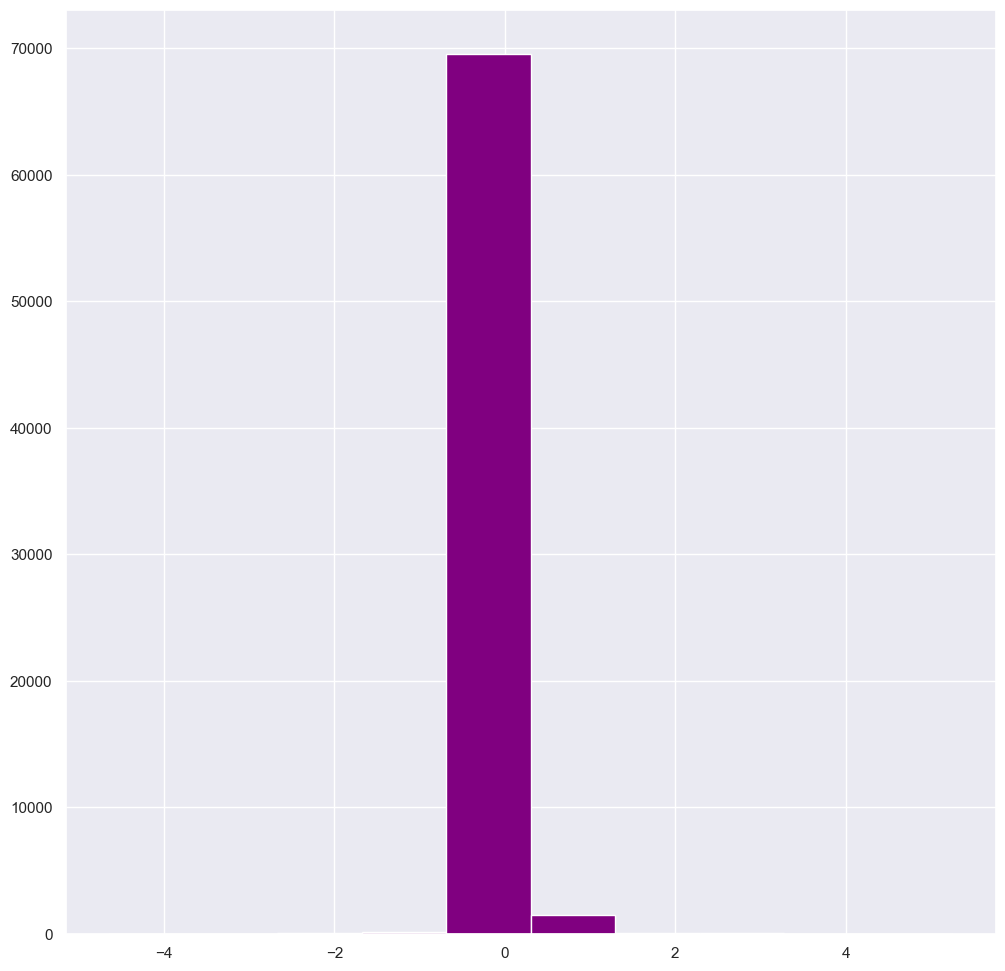

In [88]:
#Histograms for logerror of properties

plt.hist(df.logerror, color='purple');

In [ ]:
# Function to read and wrangle data:

def wrangle_zillow():
    df = pd.read_csv('zillow.csv')
    
    # Restrict df to only properties that meet single unit use criteria
    single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
    df = df[df.propertylandusetypeid.isin(single_use)]
    
    # Restrict df to only those properties with at least 1 bath & bed and 350 sqft area
    df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
            & (df.calculatedfinishedsquarefeet>350)]

    # Handle missing values i.e. drop columns and rows based on a threshold
    df = handle_missing_values(df)
    
    # Add column for counties
    df['county'] = np.where(df.fips == 6037, 'Los_Angeles',
                           np.where(df.fips == 6059, 'Orange', 
                                   'Ventura'))    
    # drop columns not needed
    df = remove_columns(df, ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc','heatingorsystemdesc','unitcnt'
                            ,'buildingqualitytypeid'])


    # replace nulls in unitcnt with 1
#     df.unitcnt.fillna(1, inplace = True)
    
    # assume that since this is Southern CA, null means 'None' for heating system
#     df.heatingorsystemdesc.fillna('None', inplace = True)
    
    # replace nulls with median values for select columns
    df.lotsizesquarefeet.fillna(7313, inplace = True)
#     df.buildingqualitytypeid.fillna(6.0, inplace = True)

    # Columns to look for outliers
    df = df[df.taxvaluedollarcnt < 2_000_000]
    df[df.calculatedfinishedsquarefeet < 8000]
    
    # Just to be sure we caught all nulls, drop them here
    df = df.dropna()
    
    return df


# <span style='color:purple'>EXPLORE MALL DATA

In [90]:
sql = 'select * from customers'

In [91]:
# acquire mall customers data using the query:

def get_mall_data(sql):
    url = w.get_connection('mall_customers')
    mall = pd.read_sql(sql, url, index_col='customer_id')
    return mall

In [92]:
# acquire data

mall = get_mall_data(sql)

In [95]:
mall.head(3)

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6


In [96]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [97]:
mall.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [98]:
mall.shape

(200, 4)

In [99]:
mall.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [100]:
mall.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

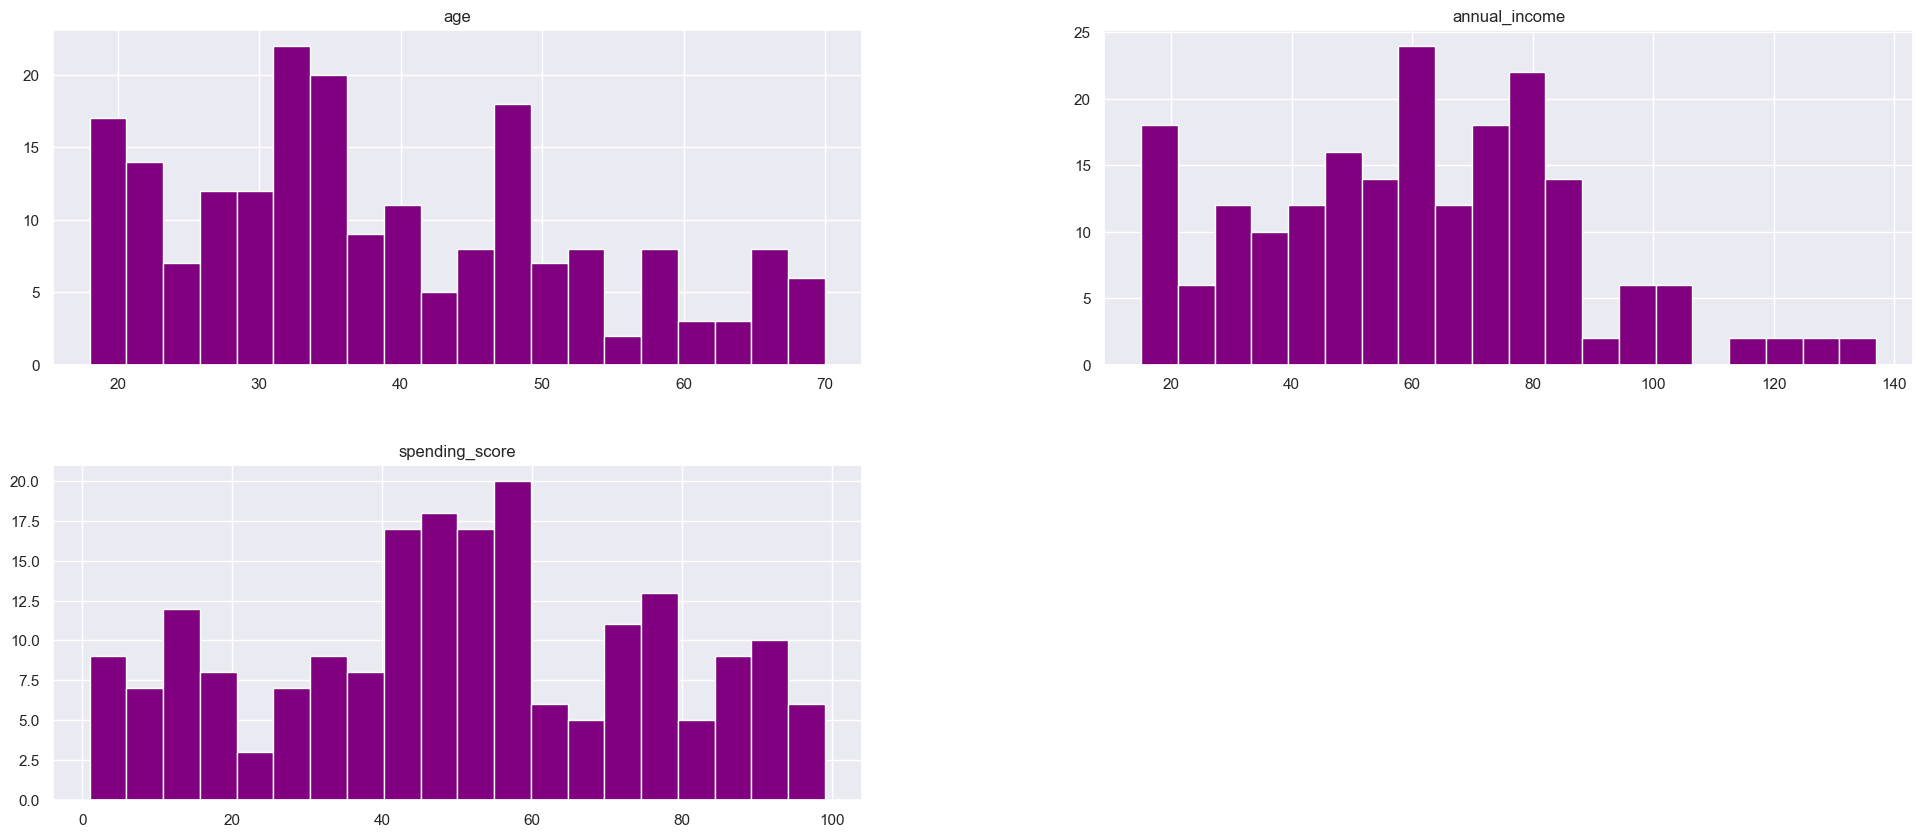

In [102]:
mall.hist(figsize=(24, 10), bins=20, color='purple');

<Axes: ylabel='spending_score'>

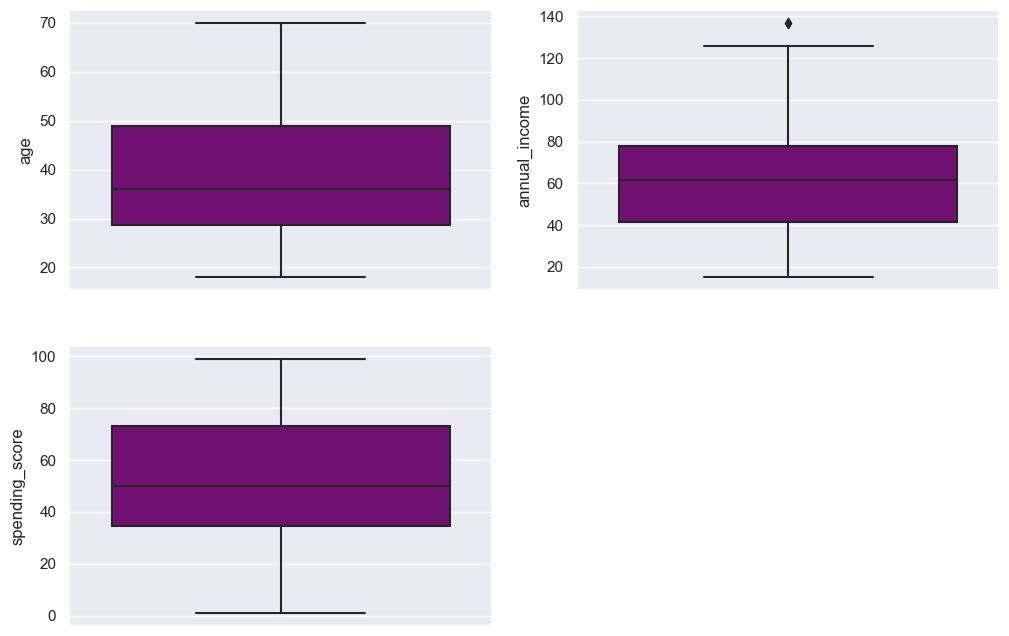

In [104]:
# visualize outliers using boxplots:

plt.figure(figsize = (12,8))
plt.subplot(221)
sns.boxplot(y = mall.age, color='purple')

plt.subplot(222)
sns.boxplot(y = mall.annual_income, color='purple')

plt.subplot(223)
sns.boxplot(y = mall.spending_score, color='purple')

Seems like we have only few outliers based on income column

In [105]:
# Calculate q1, q3 and iqr for income

q1 = mall.annual_income.quantile(0.25)
q3 = mall.annual_income.quantile(0.75)
iqr = q3 - q1
k = 1.5

# calculate upper and lower ranges
upper_bound_income =  q3 + k * iqr
lower_bound_income =  q1 - k * iqr

lower_bound_income, upper_bound_income

(-13.25, 132.75)

In [106]:
mall[mall.annual_income > upper_bound_income]

,gender,age,annual_income,spending_score
customer_id,,,,
199,Male,32,137,18
200,Male,30,137,83


In [107]:
# function to detect and eliminate outliers using IQR rule

def outlier_function(df, cols, k):
    for col in df[cols]:
        q1 = mall.annual_income.quantile(0.25)
        q3 = mall.annual_income.quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr     
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df

In [108]:
# use the outlier function defined above to handle outliers in numeric columns. k = 1.5

mall = outlier_function(mall, ['age', 'spending_score', 'annual_income'], 1.5)
mall.shape

(198, 4)

In [109]:
mall.head(3)

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6


Encode categorical columns using a one hot encoder (pd.get_dummies).

In [111]:
# encode the gender column

dummy_df = pd.get_dummies(mall.gender, drop_first=True)
dummy_df.head(3)

,Male
customer_id,
1,1
2,1
3,0


In [112]:
# concat the dummies df with original df. Drop the 'gender' column

mall = pd.concat([mall, dummy_df], axis=1).drop(columns = ['gender'])
mall.head(3)

,age,annual_income,spending_score,Male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0


#### Split data (train, validate, and test split).


In [113]:
train, test = train_test_split(mall, train_size = 0.8, random_state = 123)
train, validate = train_test_split(train, train_size = 0.75, random_state = 123)

In [114]:
# check shape
train.shape, validate.shape, test.shape

((118, 4), (40, 4), (40, 4))

#### Scaling numeric columns

In [116]:
train.head(3)

,age,annual_income,spending_score,Male
customer_id,,,,
182,32,97,86,0
49,29,40,42,0
35,49,33,14,0


In [117]:
def min_max_scaler(train, valid, test):
    '''
    Uses the train & test datasets created by the split_my_data function
    Returns 3 items: mm_scaler, train_scaled_mm, test_scaled_mm
    This is a linear transformation. Values will lie between 0 and 1
    '''
    num_vars = list(train.select_dtypes('number').columns)
    scaler = MinMaxScaler(copy=True, feature_range=(0,1))
    train[num_vars] = scaler.fit_transform(train[num_vars])
    valid[num_vars] = scaler.transform(valid[num_vars])
    test[num_vars] = scaler.transform(test[num_vars])
    return scaler, train, valid, test

In [118]:
train.select_dtypes('number').columns

Index(['age', 'annual_income', 'spending_score', 'Male'], dtype='object')

In [119]:
# use the scaler
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

In [120]:
train_scaled.head(2)

,age,annual_income,spending_score,Male
customer_id,,,,
182,0.269231,0.738739,0.867347,0.0
49,0.211538,0.225225,0.418367,0.0


In [123]:
# Write a master wrangle fuction which acquires and prepares the data

def wrangle_mall():
    
    # acquire data
    sql = 'select * from customers'
    mall = get_mall_data(sql)
    
    # handle outliers
    mall = outlier_function(mall, ['age', 'spending_score', 'annual_income'], 1.5)
    
    # get dummy for gender column
    dummy_df = pd.get_dummies(mall.gender, drop_first=True)
    mall = pd.concat([mall, dummy_df], axis=1).drop(columns = ['gender'])
    mall.rename(columns= {'Male': 'is_male'}, inplace = True)

    # split the data in train, validate and test
    train, test = train_test_split(mall, train_size = 0.8, random_state = 123)
    train, validate = train_test_split(train, train_size = 0.75, random_state = 123)
    
    return min_max_scaler, train, validate, test

In [124]:
# use the wrangle function:

scaler, train, validate, test = wrangle_mall()

In [125]:
#scaled the values
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

In [127]:
train_scaled.head(3)

,age,annual_income,spending_score,is_male
customer_id,,,,
182,0.269231,0.738739,0.867347,0.0
49,0.211538,0.225225,0.418367,0.0
35,0.596154,0.162162,0.132653,0.0
